# Purpose: Coloring Segmented Images According to Shape Mode

Date Created: 1-26-2021

Date Updated: 11-15-2021: Updated to change from the ferret paper to the Microglia/BeV paper

6-23-22: Updated to change to the Mglur5 paper

Author: Hawley Helmbrecht

**Colors:** 

shape mode 1: Blue

shape mode 2: Orange

shape mode 3: Green

shape mode 4: Red

shape mode 5: Purple

*Step 1: Import Necessary Packages*

In [1]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from PIL import Image
import os

*Step 2: User input variables*

In [4]:
im_file_path = '/Users/hhelmbre/Desktop/Mglur5_publication_analysis/vampire/test/HET/P14/Female/CA1/238_slide4_slice4_CA1_60x_zstack3_mean_threshxy30c1.png'
csv_file_path = '/Users/hhelmbre/Desktop/Mglur5_publication_analysis/shape_mode_vs_feature_all_nonsorted.csv'

*Step 3: Reading in the Image and CSV with Labels*

In [5]:
img = mpimg.imread(im_file_path)
csv_df = pd.read_csv(csv_file_path)

In [6]:
csv_df

,Filename,ImageID,ObjectID,X,Y,Area,Perimeter,Major Axis,Minor Axis,Circularity,Aspect Ratio,Shape mode,Distance from cluster center
0,238_slide4_slice4_CA1_60x_zstack3_mean_threshx...,1,1,394,64,816,420.989899,83.426063,24.932008,0.057857,3.346143,1,3.44
1,238_slide4_slice4_CA1_60x_zstack3_mean_threshx...,1,2,26,74,749,324.871104,87.603388,24.820913,0.089180,3.529419,1,3.77
2,238_slide4_slice4_CA1_60x_zstack3_mean_threshx...,1,3,148,99,1234,616.386868,106.998420,41.403682,0.040815,2.584273,1,3.44
3,238_slide4_slice4_CA1_60x_zstack3_mean_threshx...,1,4,274,113,1299,609.179762,80.178886,46.160178,0.043987,1.736971,4,4.25
4,238_slide4_slice4_CA1_60x_zstack3_mean_threshx...,1,5,458,113,308,200.024387,52.081784,17.505919,0.096737,2.975096,2,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,374_slide8_slice5_cortex_60x_zstack4_mean_thre...,6,14,162,417,297,186.716775,33.565735,26.835330,0.107053,1.250804,5,5.97
1502,374_slide8_slice5_cortex_60x_zstack4_mean_thre...,6,15,332,461,543,333.007143,61.931397,48.315126,0.061532,1.281822,1,4.35
1503,374_slide8_slice5_cortex_60x_zstack4_mean_thre...,6,16,448,486,1128,535.209199,85.362570,46.686230,0.049485,1.828431,2,3.50
1504,374_slide8_slice5_cortex_60x_zstack4_mean_thre...,6,17,59,464,907,322.527958,47.369546,36.814684,0.109568,1.286702,3,4.43


*Step 4: Getting the file name*

In [7]:
im_file_name_split = im_file_path.split('/')
length = len(im_file_name_split)
file_name = im_file_name_split[length-1]
file_name

'238_slide4_slice4_CA1_60x_zstack3_mean_threshxy30c1.png'

*Step 5: Creating a mask for labeling*

In [8]:
mask_b = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_o = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_g = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_r = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_p = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)

In [9]:
start_pt = (14,111)
cv2.floodFill(img, mask_o, start_pt, (0,0,255), flags=4)

(238111, array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), (0, 0, 512, 512))

In [10]:
mask_o = mask_o[1:-1, 1:-1]

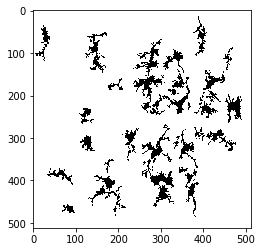

In [11]:
plt.imshow(mask_o, cmap='gray')

*Step X: Automating the Process*

*Step 1: Import need_to_label_list*

In [12]:
need_to_label_list_file_path = '/Users/hhelmbre/Desktop/Mglur5_publication_analysis/vampire/images_to_color.csv'
need_to_label_list = pd.read_csv(need_to_label_list_file_path)
need_to_label_list

,image_file_path,Image_label_path
0,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
1,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
2,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
3,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
4,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
5,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
6,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
7,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
8,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...
9,/Users/hhelmbre/Desktop/Mglur5_publication_ana...,/Users/hhelmbre/Desktop/Mglur5_publication_ana...


In [13]:
need_to_label_list2 = []
j = 0
for file_paths in range(0,need_to_label_list.shape[0]):
    arr = os.listdir(need_to_label_list['image_file_path'][j])
    image_list = np.asarray(arr)
    image_list = [x for x in image_list if ".png" in x]
    for images in image_list:
        file_name = str(need_to_label_list['image_file_path'][j] + '/' + images)
        need_to_label_list2.append(file_name)
        
    j += 1
    

*Add in a step here to visualize the shape mode labels with the colors I chose*

In [14]:
def c(x):
   col = plt.cm.twilight(x)
   fig, ax = plt.subplots(figsize=(1,1))
   fig.set_facecolor(col)
   ax.axis("off")
   plt.show()

0.5


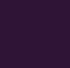

0.047


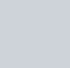

0.7


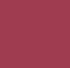

0.33


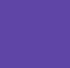

0.9


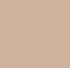

In [15]:
color_list = np.linspace(0,1,20)
color_list = [0.5, 0.047, 0.7, 0.33, 0.9]
for options in color_list:
    print(options)
    c(options)

*The code to actually recolor the images*

In [18]:
label_save_file_path = '/Users/hhelmbre/Desktop/Mglur5_publication_analysis/vampire/color_coded/'

308_slide5_slice3_CA1_60x_zstack3_mean_threshxy51c1.png
308_slide5_slice4_CA1_60x_zstack3_mean_threshxy12c1.png
238_slide4_slice4_CA1_60x_zstack3_mean_threshxy30c1.png
308_slide5_slice3_CA1_60x_zstack1_mean_threshxy21c1.png
308_slide5_slice4_CA2_60x_zstack5_mean_threshxy52c1.png
308_slide5_slice3_CA2_60x_zstack5_mean_threshxy11c1.png
238_slide4_slice3_CA2_60x_zstack5_mean_threshxy29c1.png
308_slide5_slice5_cortex_60x_zstack4_mean_threshxy26c1.png
308_slide5_slice4_cortex_60x_zstack2_mean_threshxy17c1.png
238_slide4_slice5_cortex_60x_zstack4_mean_threshxy71c1.png
238_slide4_slice5_cortex_60x_zstack5_mean_threshxy39c1.png
308_slide5_slice3_cortex_60x_zstack2_mean_threshxy13c1.png
308_slide5_slice4_cortex_60x_zstack4_mean_threshxy05c1.png
310_slide5_slice3_CA1_60x_zstack1_mean_threshxy08c1.png
213_slide5_slice4_CA1_60x_zstack2_mean_threshxy28c1.png
310_slide5_slice4_CA1_60x_zstack1_mean_threshxy45c1.png
310_slide5_slice5_CA1_60x_zstack1_mean_threshxy20c1.png
310_slide5_slice4_CA2_60x_zsta

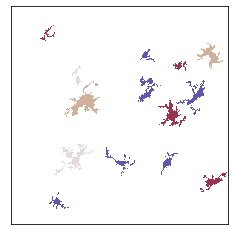

In [19]:
k = 0
cmap = plt.get_cmap('twilight')
cmap.set_bad(color = 'white')
for images in need_to_label_list2:
    
    #Reading in the image and its labels
    im_file_path = images
    img = mpimg.imread(im_file_path)
    csv_df = pd.read_csv('/Users/hhelmbre/Desktop/Mglur5_publication_analysis/shape_mode_vs_feature_all_nonsorted.csv')
    
    #Getting the file path from the file name
    im_file_name_split = im_file_path.split('/')
    length = len(im_file_name_split)
    file_name = im_file_name_split[length-1]
    print(file_name)
    
    mask = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
    
    csv_df = csv_df[csv_df.Filename == file_name]
    csv_df = csv_df.reset_index(drop=True)
    
    for shapes in range(len(csv_df)):
        shape_mode = (csv_df['Shape mode'][shapes]).astype(int)
        start_pt = (csv_df['X'][shapes], csv_df['Y'][shapes])
        area =csv_df['Area'][shapes]
        
        if img[csv_df['Y'][shapes]][csv_df['X'][shapes]]== 1:
            if shape_mode==1: #0.5
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 128

            elif shape_mode==2: #0.047
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 12
            elif shape_mode==3: #0.7
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 179

            elif shape_mode==4: #0.33
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 85

            elif shape_mode==5: #0.9
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 230

            if shapes == len(csv_df)-1:
                mask = mask[1:-1, 1:-1]
                mask[0][0] = 255
                
                mask = mask.astype('float')
                mask[mask==0] = np.nan
            
                plt.imshow(mask,cmap='twilight')
                plt.tick_params(
                    axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False)
                plt.yticks([])
                plt.savefig(str(label_save_file_path + str(k) + file_name), bbox_inches = 'tight',
    pad_inches = 0)

                #img_to_save = Image.fromarray(mask)
                #img_to_save.save(str(label_save_file_path + str(k) + file_name))

    
    k += 1

*Step 3: Environment Specs*

In [20]:
%load_ext watermark

%watermark -v -m -p numpy,pandas,scipy,skimage,matplotlib,cv2,PIL,wget

%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.8.0

numpy     : 1.21.5
pandas    : 1.3.5
scipy     : 1.3.1
skimage   : 0.17.2
matplotlib: 3.1.1
cv2       : 4.2.0
PIL       : 7.2.0
wget      : 3.2

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Last updated: Thu Jun 23 2022 14:49:03PDT

